<table width="100%"><tr style="background-color:white;">
    <td style="text-align:right;padding:0px;width:200px'"> 
                     </td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td style="text-align:right;padding:0px;width:142px'"> 
                    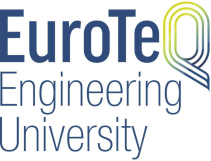 </td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td style="text-align:right;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="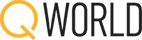
"></a></td>
    <!-- ############################################# -->
</tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

__Topics covered are:__

<mark style="background-color: darkblue; color: white;" >Qubit visualization tool, How to build and display a quantum circuit?, Classical Bit Registration and How it eliminates the phase?  </mark>

## First quantum circuit

### Hadamard operator

Hadamard operator ($ H $ or h-gate) looks similar to a fair coin-flipping.

$$
    H = \hadamard
$$

#### Start in $ \ket{0} $.

Our qubit is in |0> State.

Applying $ H $:
$$
  H \ket{0} =  \hadamard \vzero =  \stateplus.
$$

### X operator

It's also called NOT operator or Pauli X, because it flips the value of a qubit.

$ X = \X$.

Note that Pauli X Gate does not affect the orthogonal complement of |0> State, e.g, |+> State is not affected by NOT gate. See the visualization tool. It flips if it is applied to |0> or |1>.
### Bloch sphere

We will use this visualization tool during the tutorial: https://javafxpert.github.io/grok-bloch/

### Physical picture

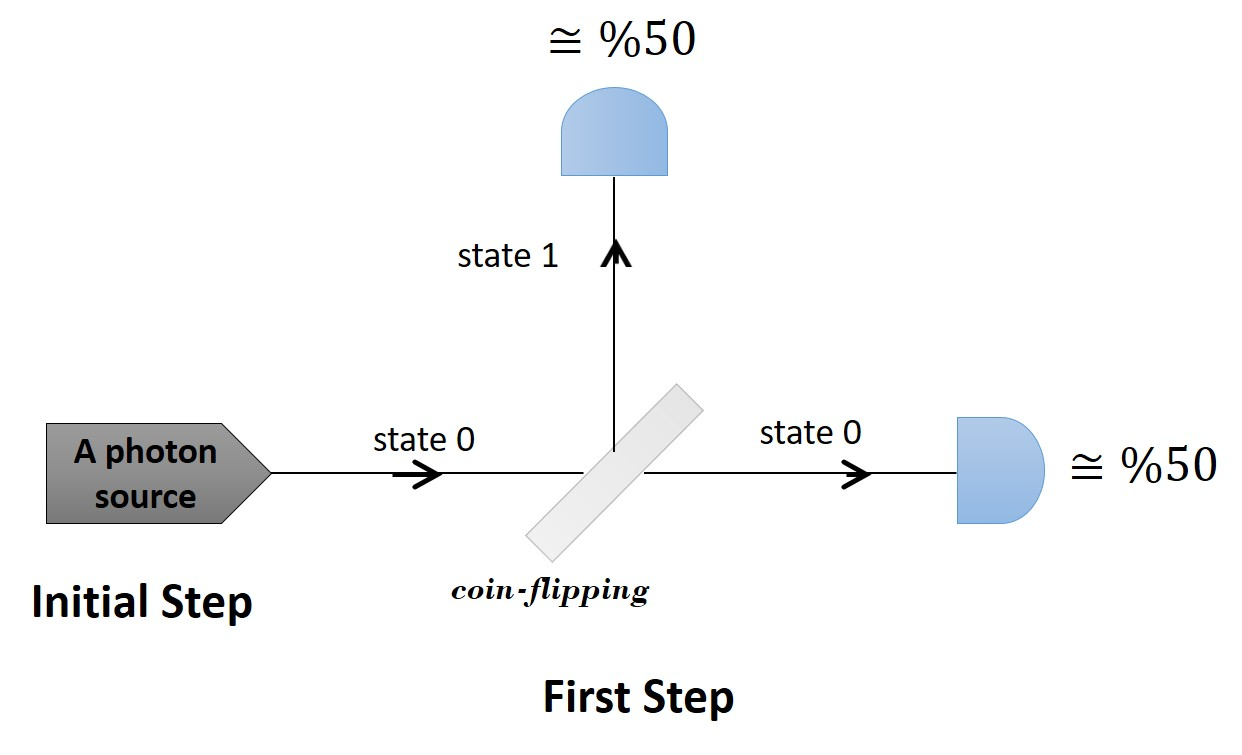

### Example 1



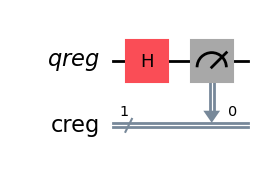

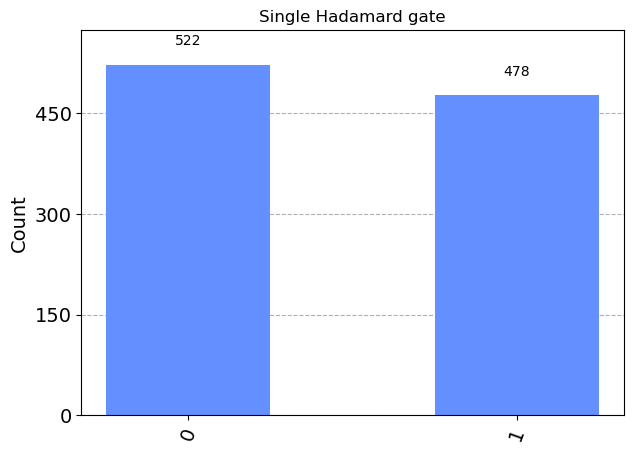

{'0': 522, '1': 478}


In [16]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# The output is given in the value of classical registers.

from qiskit_aer import AerSimulator

# import visualization 
from qiskit.visualization import plot_histogram

# define a quantum register with one qubit
# define a classical register with one bit
# By convention, qiskit initializes qubit in |0> State.

q1 = QuantumRegister(1, "qreg")
c1 = ClassicalRegister(1, "creg")

qc1 = QuantumCircuit(q1, c1)

# it stores the measurement result of the quantum part

# Define our quantum circuit.

# Apply h-gate (Hadamard: quantum coin-flipping) to the first qubit

qc1.h(q1[0])

# Measure the first qubit, and store the result in the first classical bit
qc1.measure(q1[0], c1[0])


# Draw the circuit by using matplotlib.
display(qc1.draw(output='mpl')) 

# execute the circuit and read the results
job = AerSimulator().run(qc1,shots=1000)

counts = job.result().get_counts(qc1)
display(plot_histogram(counts, title='Single Hadamard gate'))
print(counts)


### Example 2

Quantum circuits are initialized with all quantum registers in the $\ket0$ state. However, we can set values explicitly using the `initialize(<qbit values>,qregs)` function. The the standard initial state $\ket0$ can be set for a single qubit by `initialize([0,1],q2[0])` or `initialize('0',q2[0])`. 

Fill in the correct parameter to do simulate the quantum coin flipping experiment with the initial state $\ket1$:


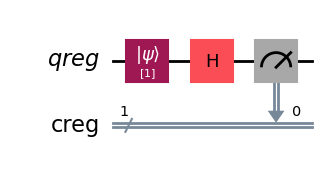

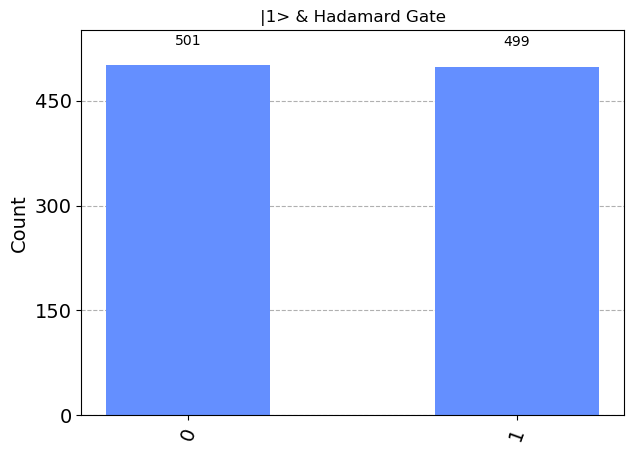

{'0': 501, '1': 499}


In [35]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

q2 = QuantumRegister(1, "qreg")
c2 = ClassicalRegister(1, "creg")

qc2 = QuantumCircuit(q2, c2)

#qc2.x(q2[0])
# OR

#qc2.initialize([0,1],q2[0])
qc2.initialize('1',q2[0])

qc2.h(q2[0])

qc2.measure(q2[0], c2[0])

display(qc2.draw(output='mpl')) 

job = AerSimulator().run(qc2,shots=1000)

counts = job.result().get_counts(qc2)

display(plot_histogram(counts, title='|1> & Hadamard Gate'))
#display(plot_histogram(counts, title='Pauli X & Hadamard Gate'))
print(counts)


## Simulating the state vector

Since we're not using a real quantum computer anyway, we can peek into the actual quantum state. But we have to change to another backend, the `statevector_simulator`.

### Example 3

Implement the same circuit as in Example 1


[0.70710678+0.j 0.70710678+0.j]


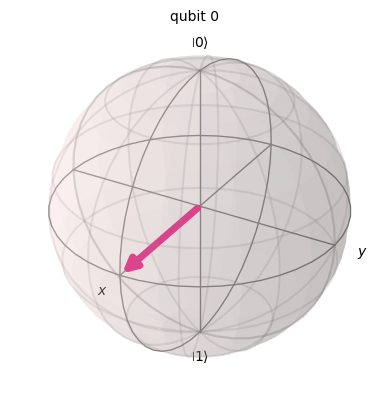

In [38]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector


q3 = QuantumRegister(1, "qreg")
c3 = ClassicalRegister(1, "creg")

qc3 = QuantumCircuit(q3, c3)

#qc3.x(q3[0])
# OR

#qc2.initialize([0,1],q2[0])
#qc2.initialize('1',q2[0])

qc3.h(q3[0])

#qc3.measure(q3[0], c3[0])

# Run simulator
job3 = StatevectorSimulator().run(qc3, shots=1000)
result3 = job3.result()
svec  = result3.get_statevector(qc3)

# Visualize the state vector at the end of the quantum circuit.
print(svec.data)
display(plot_bloch_multivector(svec))

#qc3.measure(q3[0], c3[0])

# Simulated read-out (count rates)
#counts = result3.get_counts(qc3)
#print(counts)
#plot_histogram(counts, title='Quantum coin flipping')

## Completing the interferometer

### Example 4

1. Assemble the "interferometer" using a second Hadamard gate. Use the `AerSimulator` backend just like in Exercises 1 and 2. Plot the histogram as well

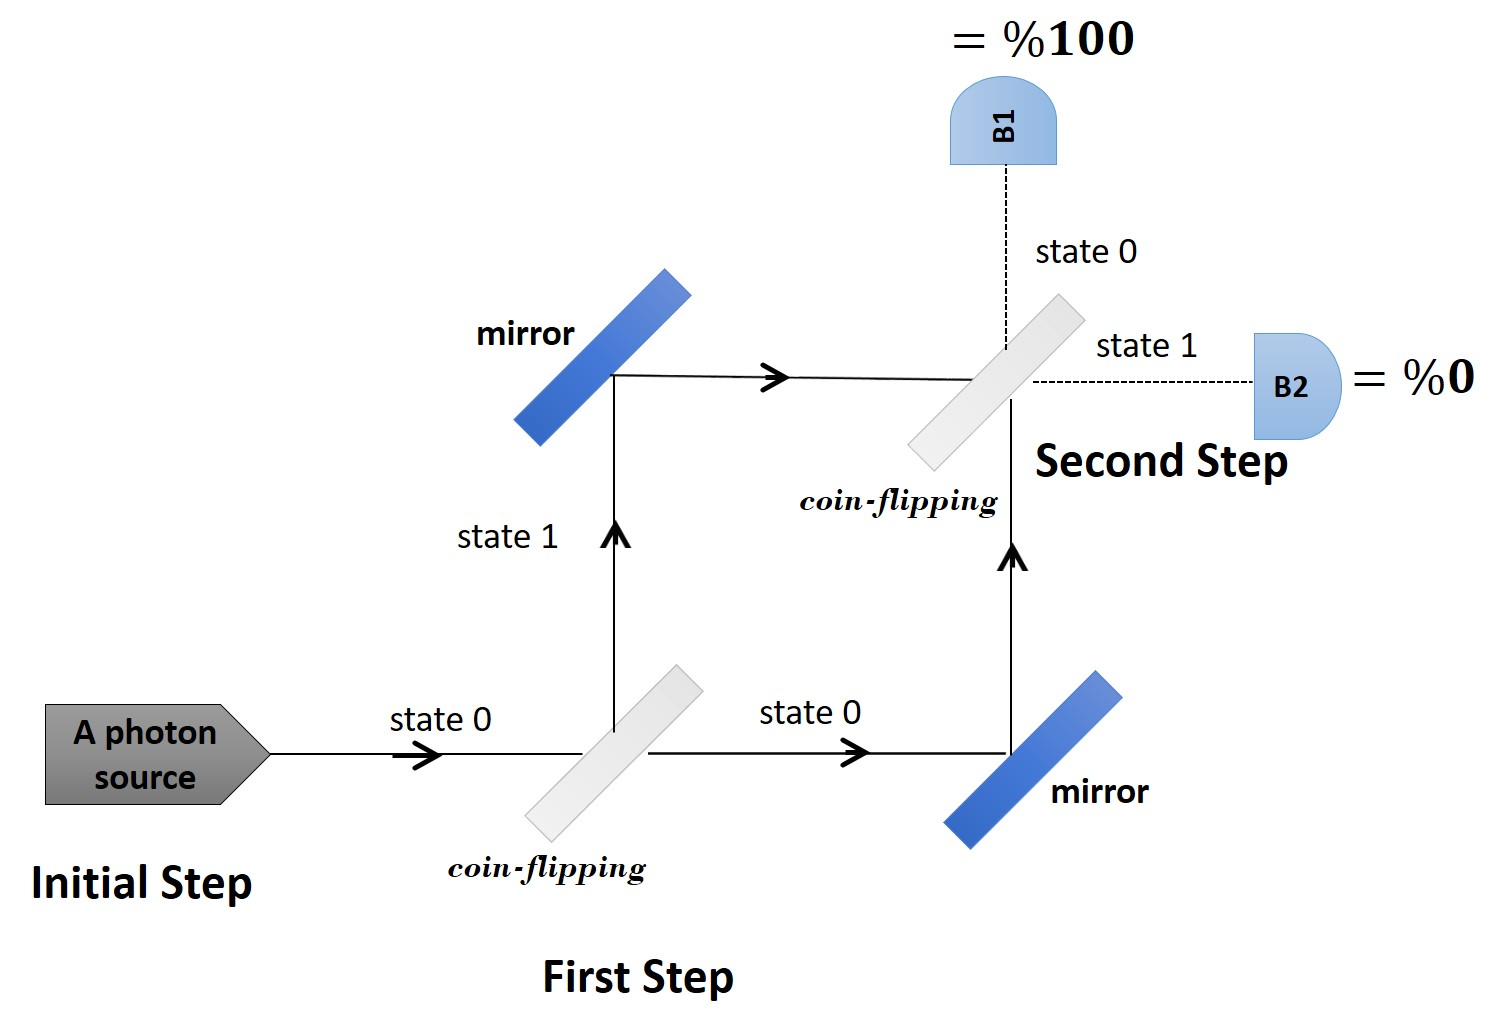

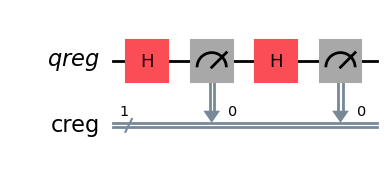

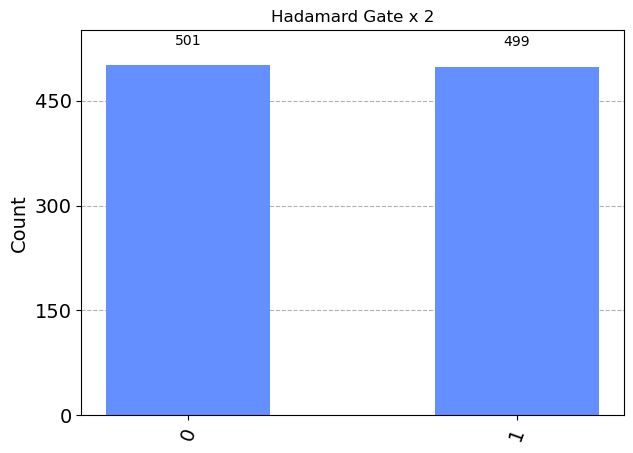

{'0': 501, '1': 499}


In [45]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

q5 = QuantumRegister(1, "qreg")
c5 = ClassicalRegister(1, "creg")

qc5 = QuantumCircuit(q5, c5)

#qc2.x(q2[0])
# OR

#qc2.initialize([0,1],q2[0])
#qc5.initialize('1',q2[0])

qc5.h(q5[0])

'''
Change the measurement instruction such that 
the measurement is stored in the same classical bit for both.

'''

# By doing the measurement, I reduce every vector on the equator to one probabilistic state.
# So, I remove the phase. I lose all the quantum features.
qc5.measure(q5[0], c5[0])

qc5.h(q5[0])
qc5.measure(q5[0], c5[0])

display(qc5.draw(output='mpl')) 

job = AerSimulator().run(qc5,shots=1000)

counts = job.result().get_counts(qc5)

display(plot_histogram(counts, title='Hadamard Gate x 2'))
#display(plot_histogram(counts, title='Hadamard Gate x 2'))
print(counts)